<a href="https://colab.research.google.com/github/Deeksha0209/Capstone-Project/blob/main/Sleep%2C_Weight_%26_Heartrate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJECTIVE -- Data Cleaning and EDA on Sleep, Weight & Heartrate Datasets.**

In [ ]:
#Step 1 is importing our required libraries & loading our dataframe using pd.read_csv function.
#I am loading both sleep & weight datasets.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/ORIGINAL DATA /sleepDay_merged.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/ORIGINAL DATA /weightLogInfo_merged.csv")

In [ ]:
#Also importing heart_rate dataset
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/ORIGINAL DATA /heartrate_seconds_merged.csv")

In [ ]:
#Now displaying top 5 entries of Sleep df
df.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
#Lets display bottom 5 entries of sleep df
df.tail(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545
412,8792009665,5/4/2016 12:00:00 AM,1,439,463


In [ ]:
#Let's have a look at our data types for sleep df
df.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [ ]:
#Lets take a look at the no of rows & colms
df.shape

(413, 5)

In [ ]:
#Display a stats summary!
df.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


#Description of Dataset -

This dataset encompasses Fitbit users' fitness tracking data spread across multiple datasets and columns. Compiled by Amazon Mechanical Turk, this diverse dataset offers comprehensive fitness information for users. The "Sleep & Weight" dataframe includes data on total sleep recors, total mins spent asleep, BMI and Weights etc for various users across different days and time intervals. Our analysis delves into key aspects of each section, conducting thorough exploratory data analysis supplemented with detailed visualizations to enhance understanding and extract valuable insights.

# **#Data Cleaning for Sleep df!**

In [ ]:
#Let's check the null values for each colm in our sleep df!
df.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [ ]:
#Lets check the duplicated entries in our df. We shall drop the duplicate entries from the df.
df.duplicated().value_counts()

False    410
True       3
dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
#Resetting index to get a smooth df
df.reset_index(drop=True, inplace=True)

In [ ]:
#Changing data type of Sleep Day colm & creating a Weekday column wrt the Sleep Day.
df['SleepDay'] = pd.to_datetime(df['SleepDay'])
df['Weekday'] = df['SleepDay'].dt.day_name()


In [ ]:
#Lets take a look at our updated df
df.shape

(410, 6)

In [ ]:
#Lets take a look at the updated data types
df.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
Weekday                       object
dtype: object

# **#Let's begin the EDA Process!**

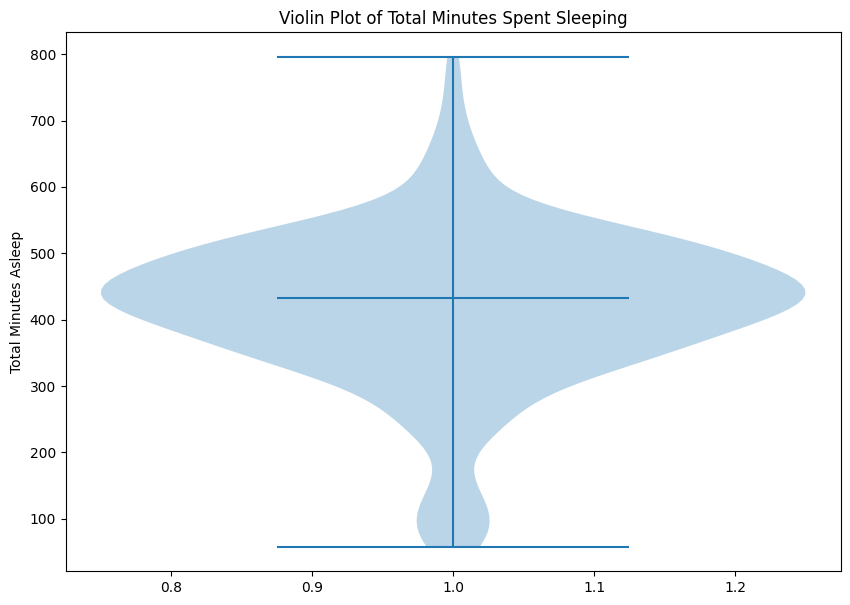

In [ ]:
#Creating a violin plot for Total Minutes Asleep. This is a hybrid of box plot & Density plot.
plt.figure(figsize=(10, 7))
plt.violinplot(dataset=[df['TotalMinutesAsleep']], showmedians=True)
plt.ylabel('Total Minutes Asleep')
plt.title('Violin Plot of Total Minutes Spent Sleeping')
plt.show()

<ipython-input-15-054f65b89517>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='TotalMinutesAsleep', data=df, palette="spring")


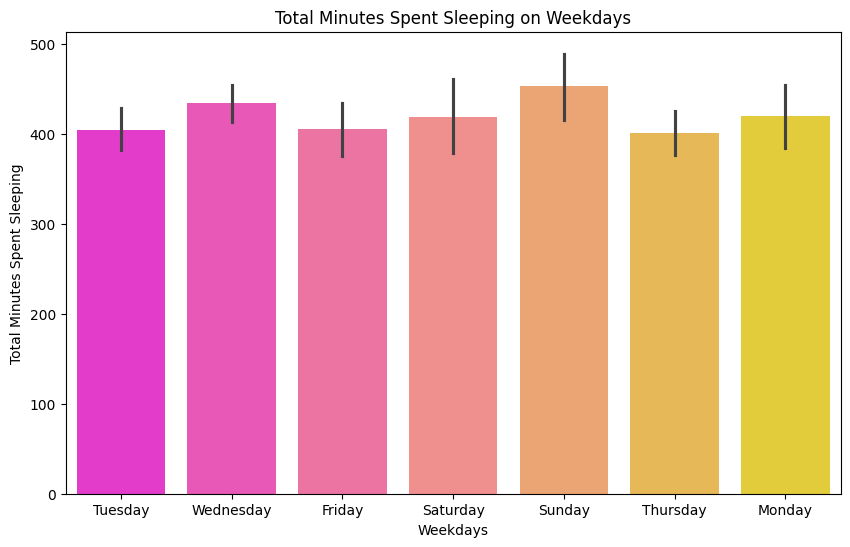

In [ ]:
#Creating a barchart to display the total minutes spent sleeping on Weekdays for users!
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='TotalMinutesAsleep', data=df, palette="spring")
plt.xlabel('Weekdays')
plt.ylabel('Total Minutes Spent Sleeping')
plt.title('Total Minutes Spent Sleeping on Weekdays')
plt.show()

<ipython-input-16-97ae672e9583>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='TotalTimeInBed', data=df, palette="flare")


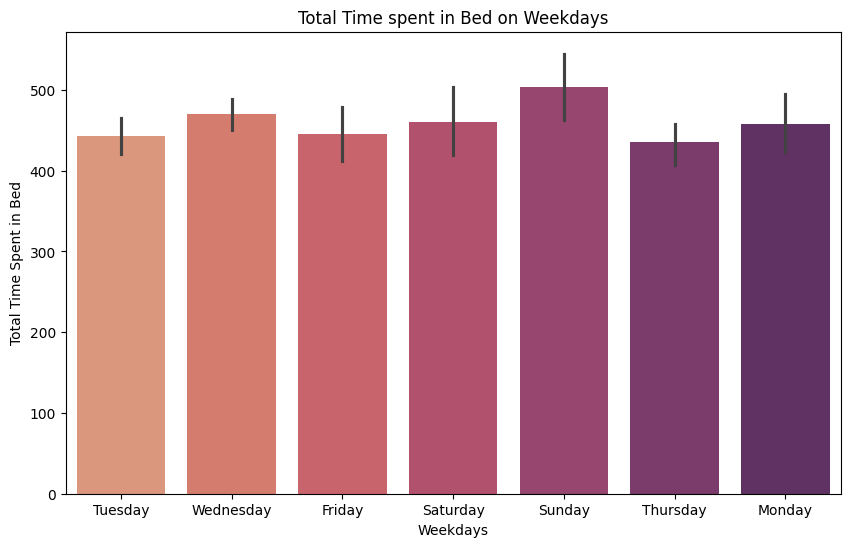

In [ ]:
#Plotting bar chart for total time spent in bed on Weekdays.
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='TotalTimeInBed', data=df, palette="flare")
plt.xlabel('Weekdays')
plt.ylabel('Total Time Spent in Bed')
plt.title('Total Time spent in Bed on Weekdays')
plt.show()
#As visible, Users prefer to spend max time in bed on Sundays.

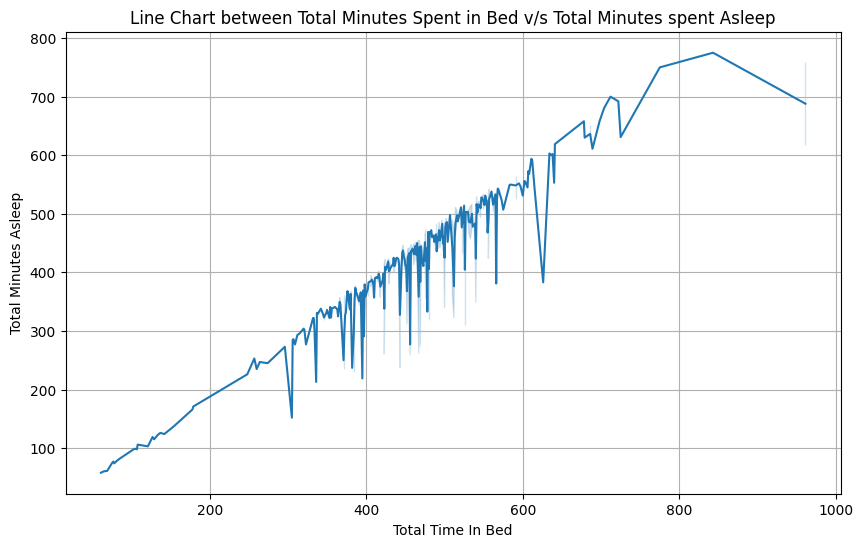

In [ ]:
#Creating line chart for total time spent in bed v/s total time spnt sleeping
plt.figure(figsize=(10, 6))
sns.lineplot(x='TotalTimeInBed', y='TotalMinutesAsleep', data=df)
plt.xlabel('Total Time In Bed')
plt.ylabel('Total Minutes Asleep')
plt.title('Line Chart between Total Minutes Spent in Bed v/s Total Minutes spent Asleep')
plt.grid(True)  # Add grid lines for better visualization if needed
plt.show()

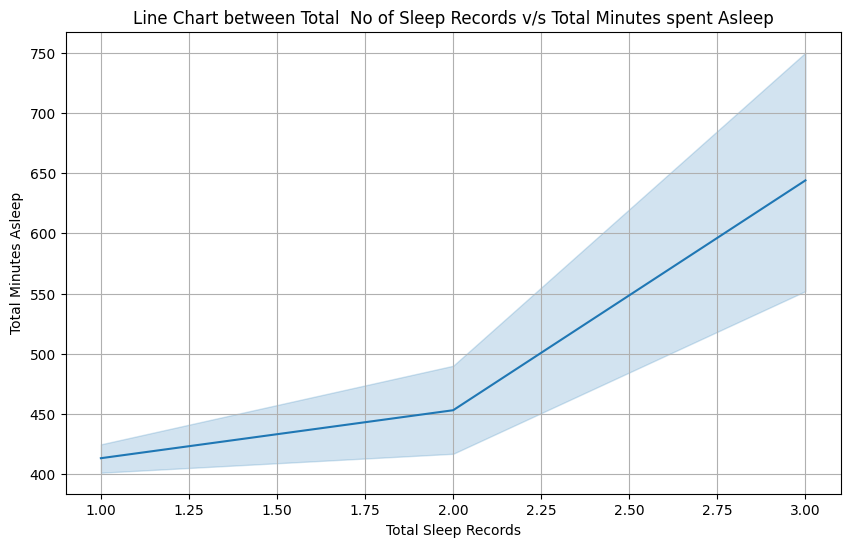

In [ ]:
#Creating line chart for total sleep records v/s total minutes spent sleeping
plt.figure(figsize=(10, 6))
sns.lineplot(x='TotalSleepRecords', y='TotalMinutesAsleep', data=df)
plt.xlabel('Total Sleep Records')
plt.ylabel('Total Minutes Asleep')
plt.title('Line Chart between Total  No of Sleep Records v/s Total Minutes spent Asleep')
plt.grid(True)  # Add grid lines for better visualization if needed
plt.show()

In [ ]:
#Let's display a df with Weekdays & cooresponding entries as mean of WeightKg values for top 6 cars!
sleep_df=df.groupby('Weekday')['TotalMinutesAsleep'].mean().round().reset_index()
sleep_sortdf=sleep_df.sort_values(by='TotalMinutesAsleep', ascending=False)
sleep_sortdf.head(6)

,Weekday,TotalMinutesAsleep
3,Sunday,453.0
6,Wednesday,435.0
1,Monday,420.0
2,Saturday,419.0
0,Friday,405.0
5,Tuesday,405.0


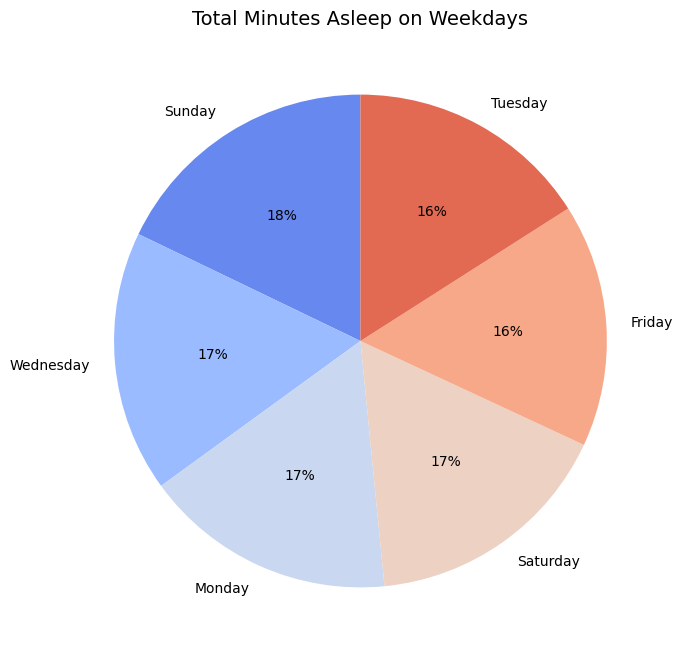

In [ ]:
#Displaying pie plot for the top 6 entries with co-oresponding Weekdays and total minutes spent sleeping
plt.figure(figsize=(10, 8))
sns.set_palette("coolwarm")
plt.pie(sleep_sortdf.head(6)['TotalMinutesAsleep'], labels=sleep_sortdf.head(6)['Weekday'], autopct='%1.0f%%', startangle=90)
plt.title('Total Minutes Asleep on Weekdays', fontsize=14)
plt.show()

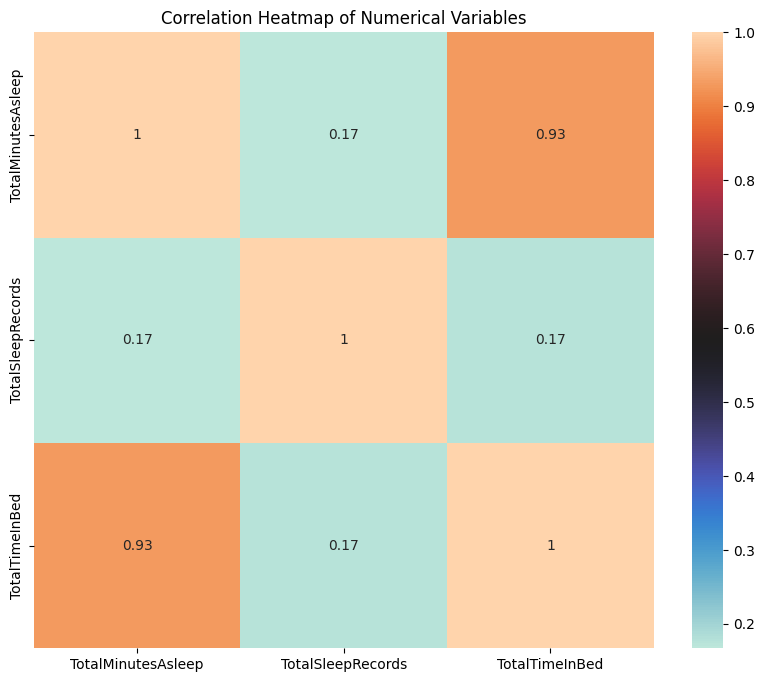

In [ ]:
#Creating co-orelation matrix in form of heatmaps among total minutes asleep, total sleep records & total time spent in bed.
numerical_columns = ['TotalMinutesAsleep', 'TotalSleepRecords', 'TotalTimeInBed']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="icefire")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

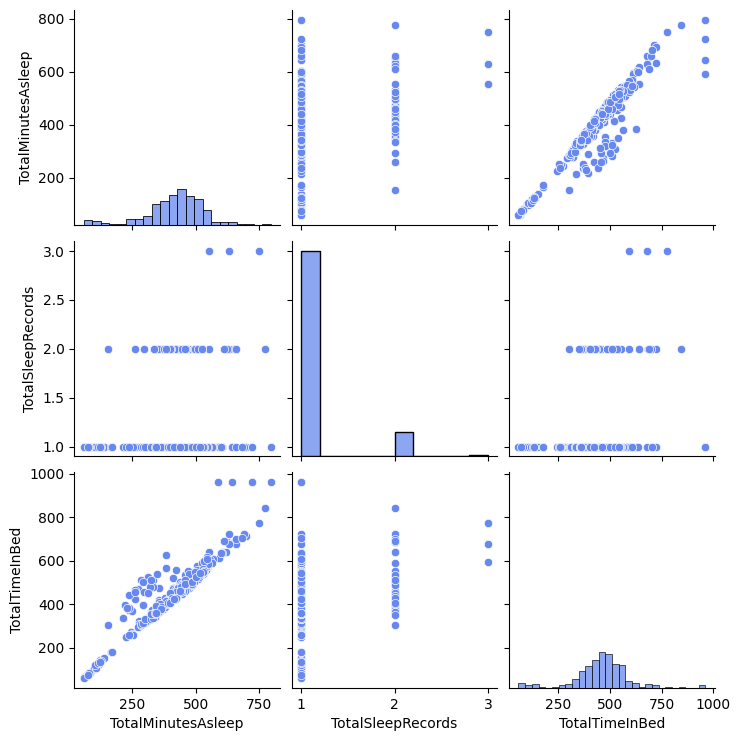

In [ ]:
#Creating a pairplot for different numerical variables
sns.pairplot(df[['TotalMinutesAsleep', 'TotalSleepRecords', 'TotalTimeInBed']])
plt.show()

#Lets work on Weight Df now

In [ ]:
#Displays top entries for weight df
df2.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 23:59,52.6,116.0,22.6,True,1462233599000
1,1503960366,5/3/2016 23:59,52.6,116.0,22.6,True,1462319999000
2,1927972279,4/13/2016 1:08,133.5,294.3,47.5,False,1460509732000
3,2873212765,4/21/2016 23:59,56.7,125.0,21.5,True,1461283199000
4,2873212765,5/12/2016 23:59,57.3,126.3,21.7,True,1463097599000


In [ ]:
#Displays bottom entries now
df2.tail()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
62,8877689391,5/6/2016 6:43,85.0,187.4,25.4,False,1462517015000
63,8877689391,5/8/2016 7:35,85.4,188.3,25.6,False,1462692953000
64,8877689391,5/9/2016 6:39,85.5,188.5,25.6,False,1462775984000
65,8877689391,5/11/2016 6:51,85.4,188.3,25.6,False,1462949507000
66,8877689391,5/12/2016 6:42,84.0,185.2,25.1,False,1463035373000


In [ ]:
#Displaying no of rows & no of colms
df2.shape

(67, 7)

In [ ]:
#Lets display the data types now
df2.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [ ]:
#Lets see a stats summary now!
df2.describe()

,Id,WeightKg,WeightPounds,BMI,LogId
count,6.700000e+01,67.000000,67.000000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.822388,25.191045,1.461772e+12
std,1.950322e+09,13.923206,30.698775,3.062764,7.829948e+08
min,1.503960e+09,52.600000,116.000000,21.500000,1.460444e+12
25%,6.962181e+09,61.400000,135.400000,24.000000,1.461079e+12
50%,6.962181e+09,62.500000,137.800000,24.400000,1.461802e+12
75%,8.877689e+09,85.050000,187.500000,25.600000,1.462375e+12
max,8.877689e+09,133.500000,294.300000,47.500000,1.463098e+12


# **#Proceeding to Data Cleaning for df2**

In [ ]:
#Changing data type & creating a Weekday colm wrt the Date column.
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Weekday'] = df2['Date'].dt.day_name()


In [ ]:
#Checking null values for the columns
df2.isna().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
Weekday           0
dtype: int64

In [ ]:
#Checking duplicates
df2.duplicated().value_counts()

False    67
dtype: int64

In [ ]:
#Lets get an info abt the df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   BMI             67 non-null     float64       
 5   IsManualReport  67 non-null     bool          
 6   LogId           67 non-null     int64         
 7   Weekday         67 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 3.9+ KB


# **#EDA on Weight Log Data**

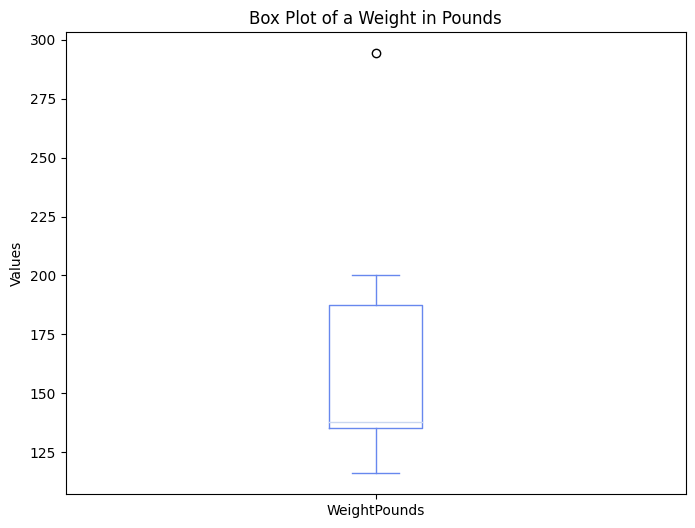

In [ ]:
#Creating a box plot to analyse the Weight data
plt.figure(figsize=(8, 6))
df2['WeightPounds'].plot(kind='box')
plt.title('Box Plot of a Weight in Pounds')
plt.ylabel('Values')
plt.show()

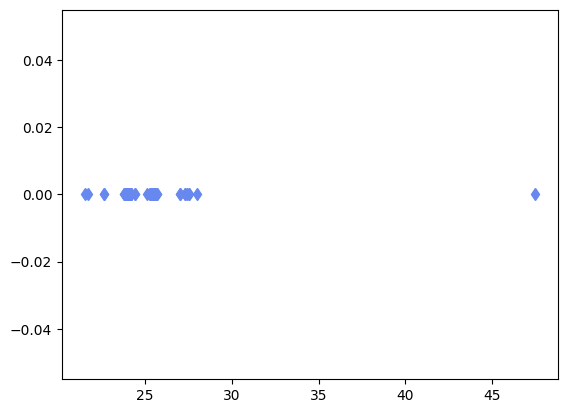

In [ ]:
#Creating a 1d scatter plot for BMI column
plt.plot(df2['BMI'],np.zeros_like(df2['BMI']),'d')
plt.show()

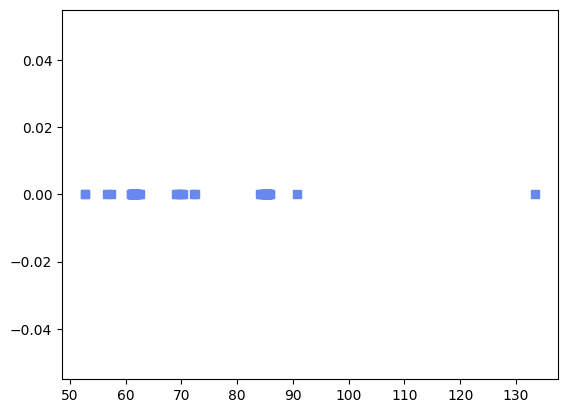

In [ ]:
plt.plot(df2['WeightKg'],np.zeros_like(df2['WeightKg']),'s')
plt.show()

<ipython-input-36-e729293aa150>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['BMI'])


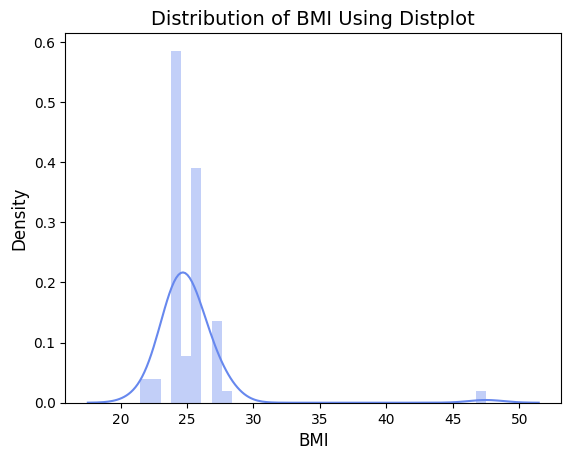

In [ ]:
#Creating a distribution plot for BMI
plt.figure(1)
sns.distplot(df2['BMI'])
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of BMI Using Distplot', fontsize=14)
plt.show()

<ipython-input-37-176e1a8f45c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2['WeightKg'],label='Weight in Kgs', shade=True)


<Axes: xlabel='WeightKg', ylabel='Density'>

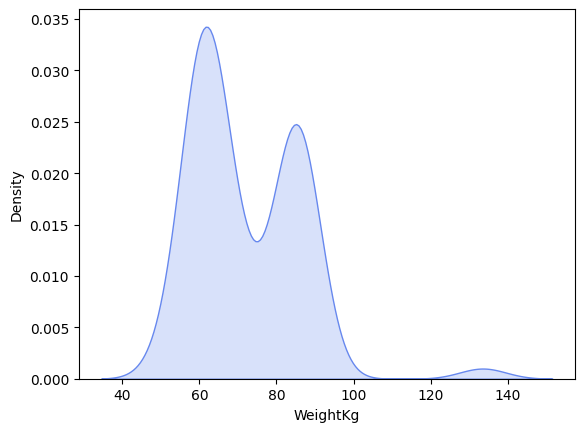

In [ ]:
#Creating a kernal density plot fro Weight column
sns.kdeplot(data=df2['WeightKg'],label='Weight in Kgs', shade=True)

In [ ]:
#Displaying top 10 entries for count of users
id_count=df2['Id'].value_counts().reset_index()
id_count.columns=['Id', 'Count']
id_count.head(10)

,Id,Count
0,6962181067,30
1,8877689391,24
2,4558609924,5
3,1503960366,2
4,2873212765,2
5,4319703577,2
6,1927972279,1
7,5577150313,1


In [ ]:
#Lets check the entries for user 4558609924
id_df2=df2.loc[df2['Id'] == 4558609924]
id_df2

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId,Weekday
7,4558609924,2016-04-18 23:59:00,69.7,153.7,27.3,True,1461023999000,Monday
8,4558609924,2016-04-25 23:59:00,70.3,155.0,27.5,True,1461628799000,Monday
9,4558609924,2016-05-01 23:59:00,69.9,154.1,27.3,True,1462147199000,Sunday
10,4558609924,2016-05-02 23:59:00,69.2,152.6,27.0,True,1462233599000,Monday
11,4558609924,2016-05-09 23:59:00,69.1,152.3,27.0,True,1462838399000,Monday


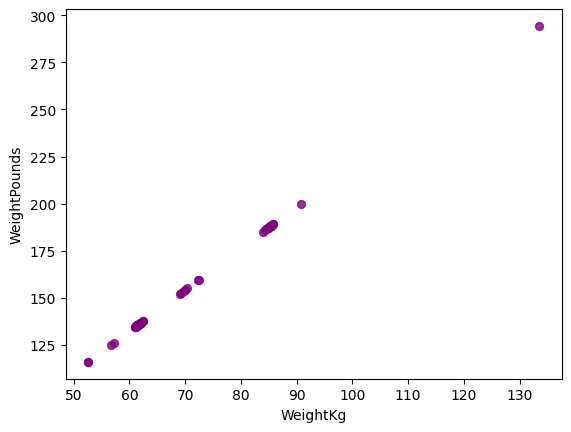

In [ ]:
#Displaying scatter plot for Weights
from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='WeightKg', y='WeightPounds', s=32, alpha=.8, color="purple")
plt.show()

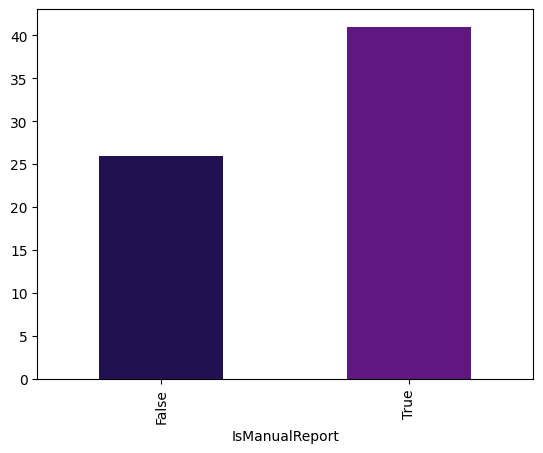

In [ ]:
#Creating bar chat for boolean values.
df2.groupby('IsManualReport').size().plot(kind='bar', color=sns.palettes.mpl_palette('magma'))
plt.show()

<ipython-input-42-a1ad79980f31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI', y='Weekday', data=df2, palette="icefire", orient='h')


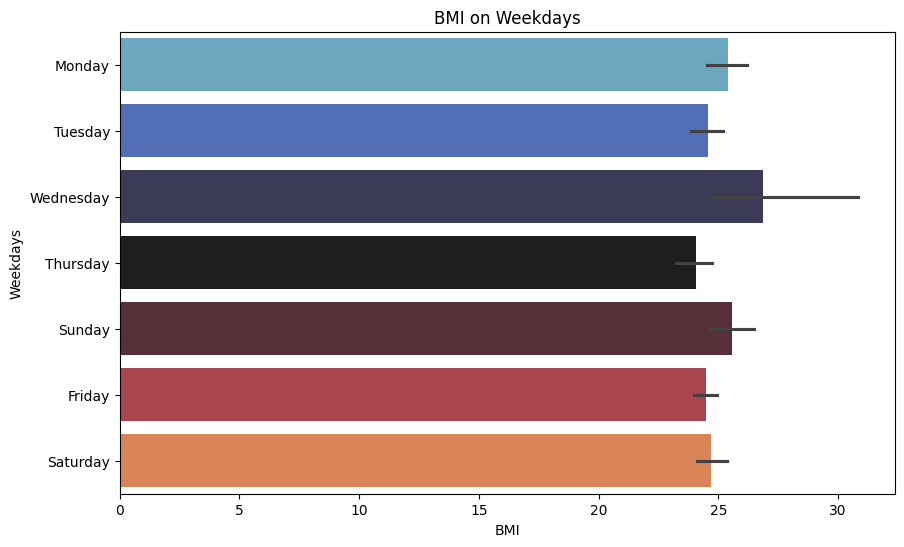

In [ ]:
#Plotting bar chart for BMI on Weekdays fro users!
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI', y='Weekday', data=df2, palette="icefire", orient='h')
plt.xlabel('BMI')
plt.ylabel('Weekdays')
plt.title('BMI on Weekdays')
plt.show()
#As visible, BMI Values are max on Wednesday & min on Thursday.

<ipython-input-43-981b2cdc0174>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WeightKg', y='Weekday', data=df2, palette="viridis", orient='h')


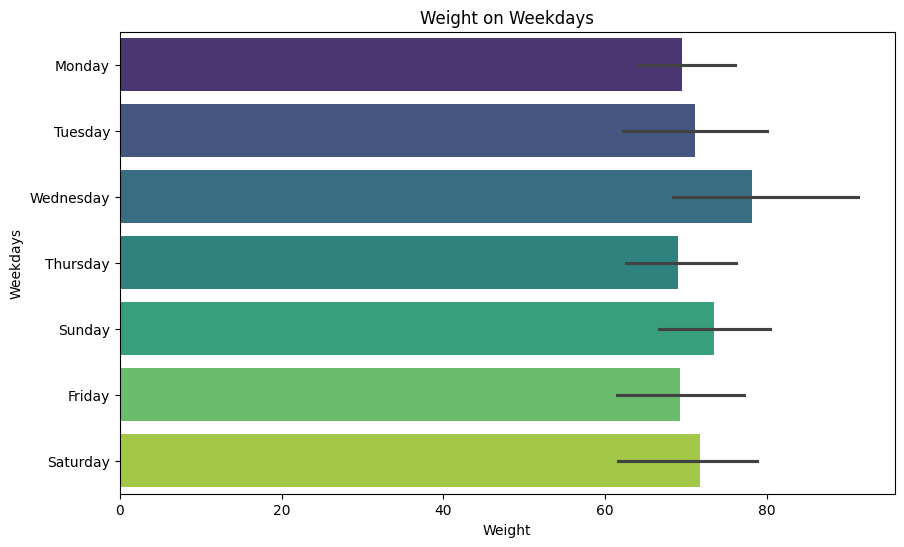

In [ ]:
#Creating a horizontal bar chart for Weight in kgs on Weekdays!
plt.figure(figsize=(10, 6))
sns.barplot(x='WeightKg', y='Weekday', data=df2, palette="viridis", orient='h')
plt.xlabel('Weight')
plt.ylabel('Weekdays')
plt.title('Weight on Weekdays')
plt.show()

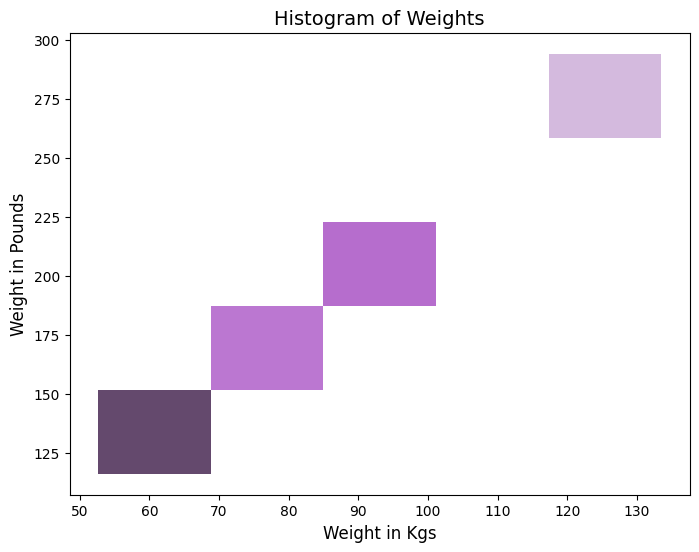

In [ ]:
#Creating a histogram for Weights of Users!
plt.figure(figsize=(8, 6))
sns.set_palette("rocket")
sns.histplot(data=df2, x='WeightKg', y='WeightPounds', bins=5)
plt.xlabel('Weight in Kgs', fontsize=12)
plt.ylabel('Weight in Pounds', fontsize=12)
plt.title('Histogram of Weights', fontsize=14)
plt.show()

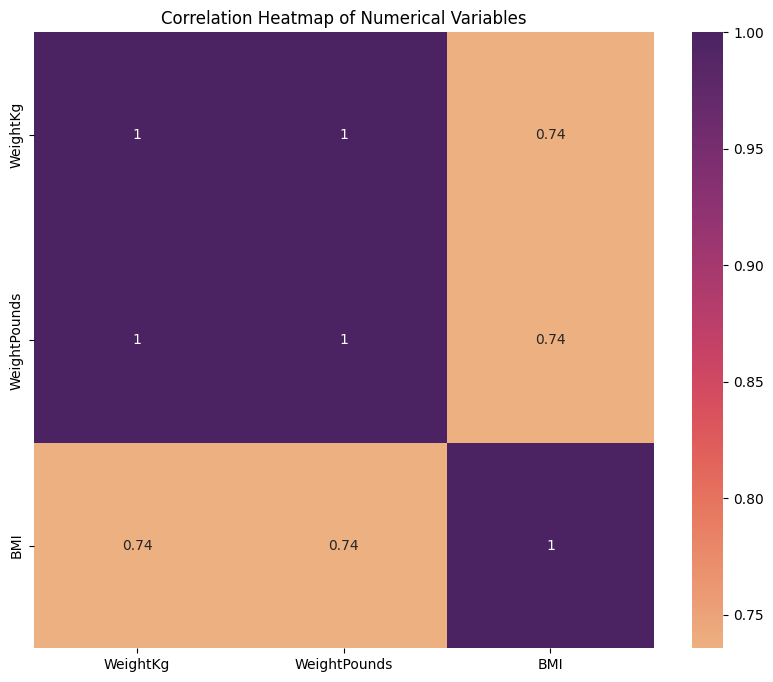

In [ ]:
#Creating correlation matrix for numerical colms in form of heatmaps.
numerical_columns = ['WeightKg', 'WeightPounds', 'BMI']
correlation_matrix = df2[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="flare")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

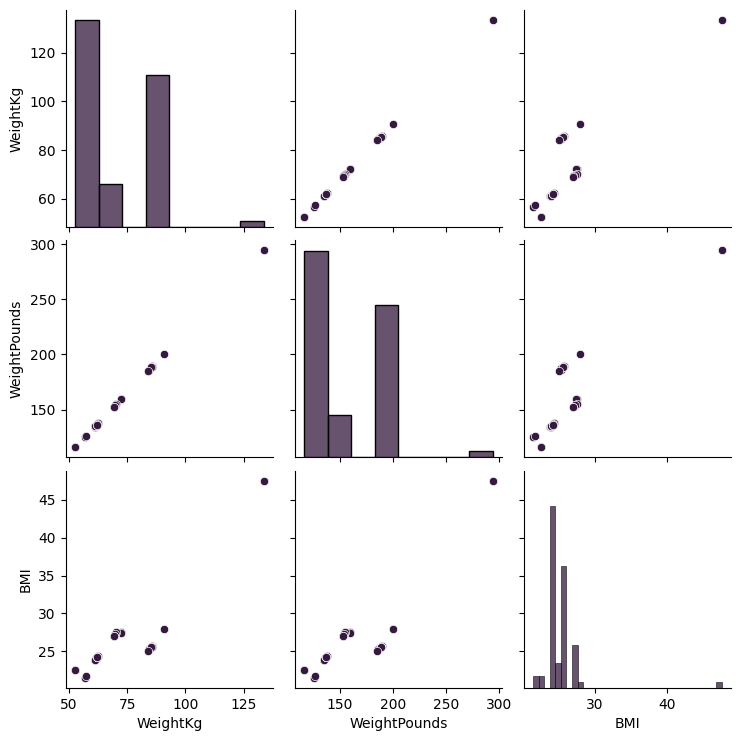

In [ ]:
#Creating pairplots for Weights & BMI
sns.pairplot(df2[['WeightKg', 'WeightPounds', 'BMI']])
plt.show()

# **#Lets work on heart rate df also.**

In [ ]:
#Listing top 5 entries of df3
df3.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [ ]:
#Listing bottom entries of df3
df3.tail(3)

,Id,Time,Value
2483655,8877689391,5/12/2016 2:44:03 PM,55
2483656,8877689391,5/12/2016 2:44:18 PM,55
2483657,8877689391,5/12/2016 2:44:28 PM,56


In [ ]:
#Generating random sample for this df
df3.sample(2)

,Id,Time,Value
1900884,6962181067,5/1/2016 5:30:30 AM,70
886607,4558609924,4/19/2016 2:58:30 PM,85


In [ ]:
#Let's display data types for this df
df3.dtypes

Id        int64
Time     object
Value     int64
dtype: object

In [ ]:
#Let's take a look at the no of rows & colmns
df3.shape

(2483658, 3)

In [ ]:
#Fetching a info of entire df
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


# **Data Cleaning for Df3**

In [ ]:
#Checking null values for each colm
df3.isna().sum()

Id       0
Time     0
Value    0
dtype: int64

In [ ]:
#Checking for duplicate entries now.
df3.duplicated().value_counts()

False    2483658
dtype: int64

In [ ]:
#Converting data types & creating weekday column from Time
df3['Time'] = pd.to_datetime(df3['Time'])
df3['Weekday'] = df3['Time'].dt.day_name()


In [ ]:
#Checking no of rows & columns for df3
df3.shape

(2483658, 4)

In [ ]:
#Lets display a stats summary!
df3.describe()

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


# **#EDA on heartrate dataset!**

In [ ]:
#Finding mode value from df
df3['Value'].mode()

0    64
Name: Value, dtype: int64

In [ ]:
#Checking out max & min value
df3['Value'].max()

203

In [ ]:
df3['Value'].min()

36

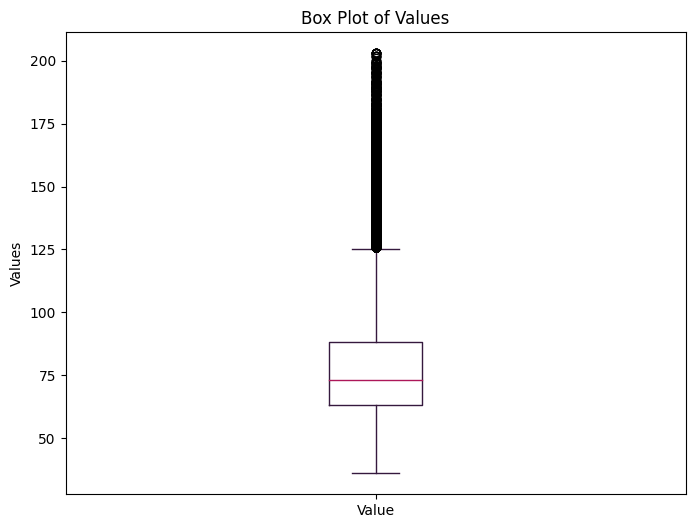

In [ ]:
#Creating a box plot for Value colm
plt.figure(figsize=(8, 6))
df3['Value'].plot(kind='box')
plt.title('Box Plot of Values')
plt.ylabel('Values')
plt.show()

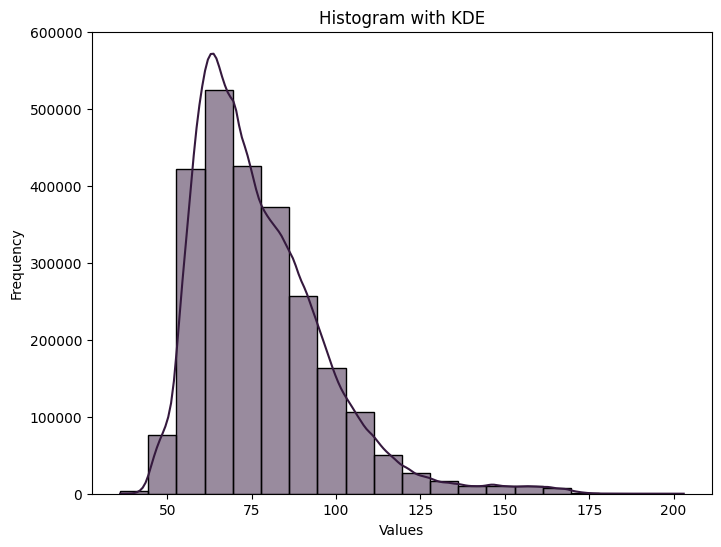

In [ ]:
#Displaying a histogram with a KDE plot. Looking interesting!
plt.figure(figsize=(8, 6))
sns.histplot(df3['Value'], kde=True, bins=20)
plt.title('Histogram with KDE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

<ipython-input-79-62038de300b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Value', data=df3, palette="rocket")


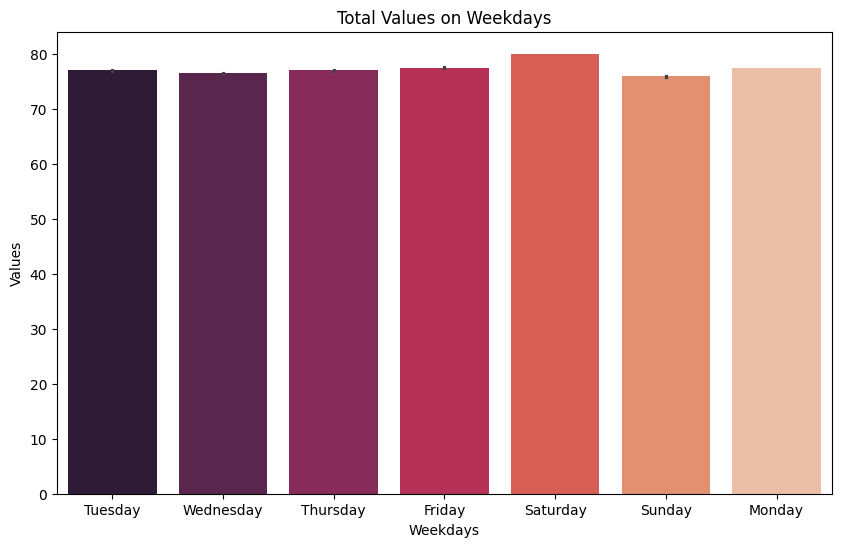

In [ ]:
#Let's display a bar plot for Total values on Weekdays
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Value', data=df3, palette="rocket")
plt.xlabel('Weekdays')
plt.ylabel('Values')
plt.title('Total Values on Weekdays')
plt.show()
#Looks like Max total of values for users' heart rate is displayed on Saturday followed closely by Friday!

In [ ]:
#Exportuing our df into csv
df2.to_csv('/content/WeightData.csv', index=False)

In [ ]:
df.to_csv('/content/SleepData.csv', index=False)

In [ ]:
df3.to_csv('/content/HeartRate.csv', index=False)

# **CONCLUSION --**
# With this we come to the end of our Exploratory Data Analysis! EDA ia an extensive process which involves digging deeper into the dataset and exploring hidden data which will help us analyze our results based on independent and dependent variables in an informed manner and gain better insight into the data via various methods of analysis. EDA involvs visualizations which help decipher the meaning of data and communicate our results to the user smoothly. Visualisations help in indentifying patterns and trends presnt in the dataset which can further aid in hypothesis generation - it is a form of interactive exploration! In this dataset, I was able to explore and gain insights using different types of plots such as scatter plots(useful for both unvariate and bi variate analysis), bar charts & pie plots for different categories & pairplots followed by heatmaps for different numerical data entries!